<a href="https://colab.research.google.com/github/j0k3rD/Artificial-Intelligence/blob/main/practica_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Ejercicio:** Cargar el dataset que se encuentra en la carpeta por default de Google Colab que se llama `sample_data`, alli hay un conjunto de entrenemiento y testeo que se llama respectivamente `/content/sample_data/california_housing_train.csv` y `/content/sample_data/california_housing_test.csv`

La idea es seguir los pasos de:
1. Cargar los datasets.
2. Explorar los datos (distribuciones, tipo de data, valores nulos `df.isna().sum()`, correlacion, pairplot, etc)
3. Elegir las variables.
4. Si es necesario normalizar [0,1] usando `MinMaxScaler` de sklearn.
5. Elegir un modelo de regresion.
6. Entrenar.
7. Evaluar el modelo.
8. Hacer prediccion.
9. Calcular metricas de prediccion.

# Dos variables: Regresion Multiple

## 1. Cargamos el Dataset

In [126]:
# A veces es mejor como buena práctica tener todos los importes antes del código
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics as ms
from scipy.stats import shapiro
import seaborn as sns
sns.set()

In [127]:
data = pd.read_csv('bitcoin_2017_to_2023.csv')
data.head(5) #visualizamos los primeros 5 registros

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258.0,0.89391,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317.0,2.24546,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451.0,2.70873,78290.170121
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483.0,10.22981,295738.166916
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686.0,16.50452,476955.246611


### 1.1 Limpiamos el Dataset

In [149]:
pd.isna(data)

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
29971,False,False,False,False,False,False,False,False,False,False
29972,False,False,False,False,False,False,False,False,False,False
29973,False,False,False,False,False,False,False,False,False,False
29974,False,False,False,False,False,False,False,False,False,False


In [98]:
data = data.dropna() #No hacerlo ya que perdemos los otros datos

In [151]:
data.isna().sum()

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              1
number_of_trades                0
taker_buy_base_asset_volume     1
taker_buy_quote_asset_volume    1
dtype: int64

In [132]:
data['volume'] = data['volume'].fillna(data['volume'].mean())

In [150]:
data['number_of_trades'] = data['number_of_trades'].fillna(data['number_of_trades'].mean())

## 2. Elegimos dos variables

In [152]:
X = data[["volume","number_of_trades"]].to_numpy()
y = data['close'].to_numpy()

In [153]:
# Observamos 5 ejemplos de los datos en X e y
# También observamos el formato y la cantidad de datos que hay en cada variable
print(f"X ('volume','number_of_trades') tiene la forma: {X.shape} | posee cantidad de datos: {len(X)}\nAlgunos ejemplos se ven así:\n{X[:5]}")
print(f"\nY ('close') tiene la forma: {y.shape} | posee cantidad de datos: {len(y)}\n5 ejemplos se ven así: {y[:5]}")

X ('volume','number_of_trades') tiene la forma: (29976, 2) | posee cantidad de datos: 29976
Algunos ejemplos se ven así:
[[  4.68658 258.     ]
 [  4.77589 317.     ]
 [ 11.52263 451.     ]
 [ 15.8961  483.     ]
 [ 37.74657 686.     ]]

Y ('close') tiene la forma: (29976,) | posee cantidad de datos: 29976
5 ejemplos se ven así: [28902.49 28902.49 28902.49 28908.53 28907.41]


## 3. Analizamos el Dataset

In [154]:
# Normalidad la calculamos usando el test de Shapiro-Wilk
normalidad_X_volume = shapiro(X[:,0]) #evaluamos normalidad de los datos de X ('area')
normalidad_X_number_of_trades = shapiro(X[:,1]) #evaluamos normalidad de los datos de X ('rooms')
normalidad_y = shapiro(y) #evaluamos normalidad de los datos de y

print(f"Normalidad de X_volume: {normalidad_X_volume}")
print(f"Normalidad de X_number_of_trades: {normalidad_X_number_of_trades}")
print(f"Normalidad de y: {normalidad_y}")

Normalidad de X_volume: ShapiroResult(statistic=0.32490843534469604, pvalue=0.0)
Normalidad de X_number_of_trades: ShapiroResult(statistic=0.3434831500053406, pvalue=0.0)
Normalidad de y: ShapiroResult(statistic=0.9424259662628174, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


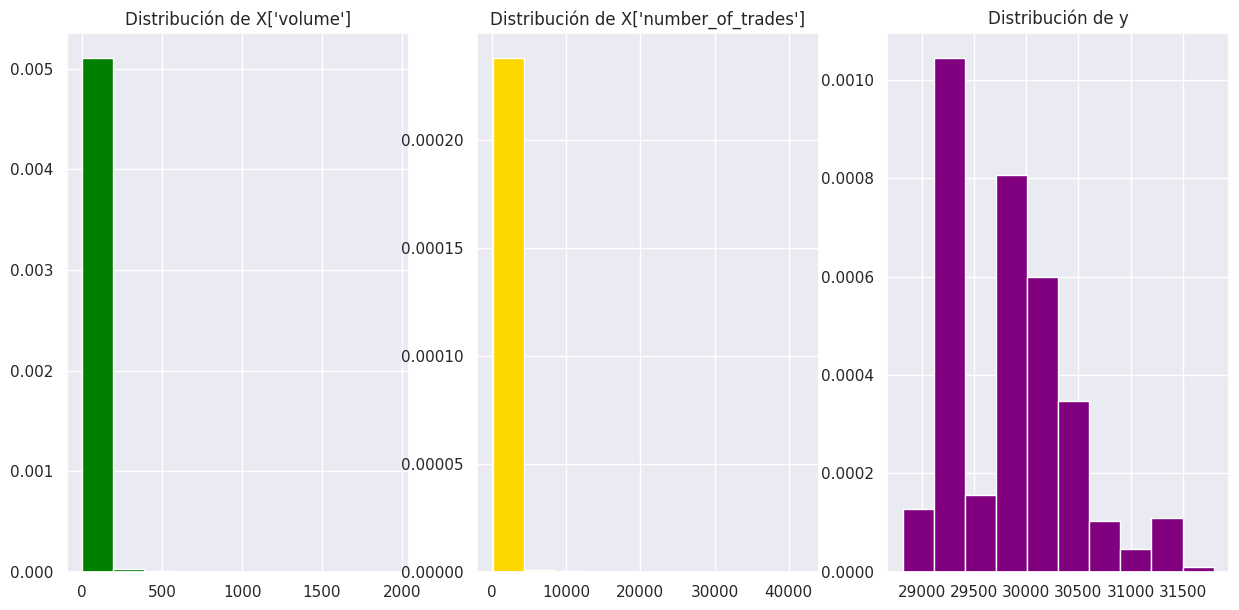

In [155]:
#Vemos como se distribuyen ambos conjuntos de datos X e Y
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.hist(X[:,0],color='green',density=True)
plt.title("Distribución de X['volume']")
plt.subplot(1,3,2)
plt.hist(X[:,1],color='gold',density=True)
plt.title("Distribución de X['number_of_trades']")
plt.subplot(1,3,3)
plt.hist(y,color='purple',density=True)
plt.title("Distribución de y");

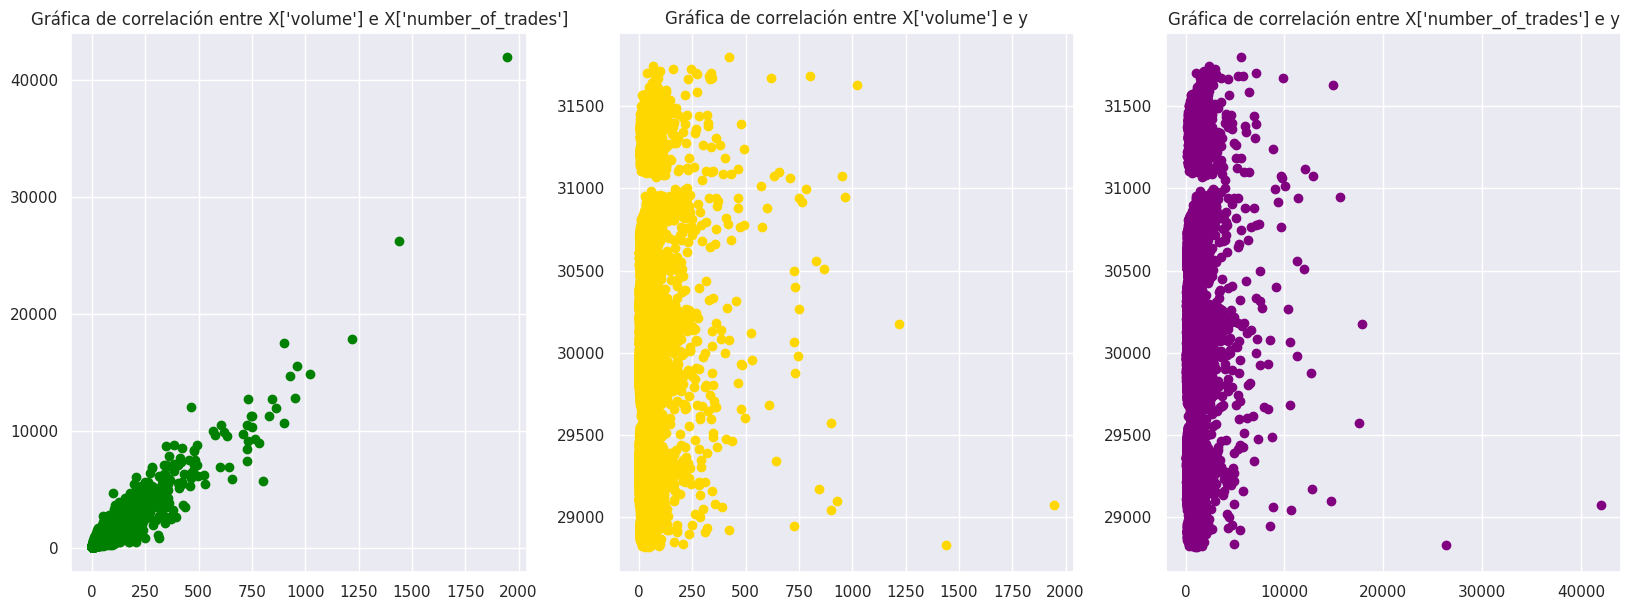

In [156]:
#Vemos si se correlacionan
#Hacemos primero un scatterplot
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.scatter(X[:,0],X[:,1],color='green')
plt.title("Gráfica de correlación entre X['volume'] e X['number_of_trades']")
plt.subplot(1,3,2)
plt.scatter(X[:,0],y,color='gold')
plt.title("Gráfica de correlación entre X['volume'] e y")
plt.subplot(1,3,3)
plt.scatter(X[:,1],y,color='purple')
plt.title("Gráfica de correlación entre X['number_of_trades'] e y");

<ipython-input-157-0d75c3e38e3d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='coolwarm', annot=True)


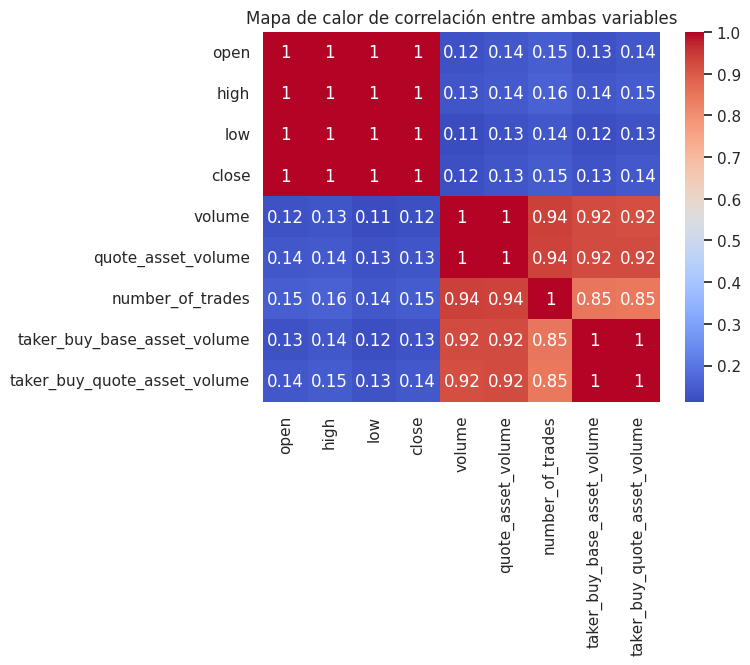

In [157]:
#Luego hacemos un mapa de calor
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.title("Mapa de calor de correlación entre ambas variables");

## 4. Transformamos los datos

In [158]:
# En lo particular, elegí hacerlo con MinMaxScaler. Transforma todos los datos a la misma escala.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [159]:
X.shape

(29976, 2)

In [160]:
X_transformed = scaler.fit_transform(X) #escalamos los datos de entrada X con la función .fit_transform()
print(f"X_transformed: {X_transformed.shape}")

X_transformed: (29976, 2)


In [161]:
#ploteamos como se ven 5 ejemplos de datos normales vs escalados. ESTO ESTA BUENO PARA REDES NEURONALES.
print(f"X original: {X[:5]}\n")
print(f"X transformed: {X_transformed[:5]}")

X original: [[  4.68658 258.     ]
 [  4.77589 317.     ]
 [ 11.52263 451.     ]
 [ 15.8961  483.     ]
 [ 37.74657 686.     ]]

X transformed: [[0.00227738 0.00450999]
 [0.00232333 0.00591787]
 [0.00579415 0.00911542]
 [0.00804405 0.00987902]
 [0.0192849  0.01472308]]


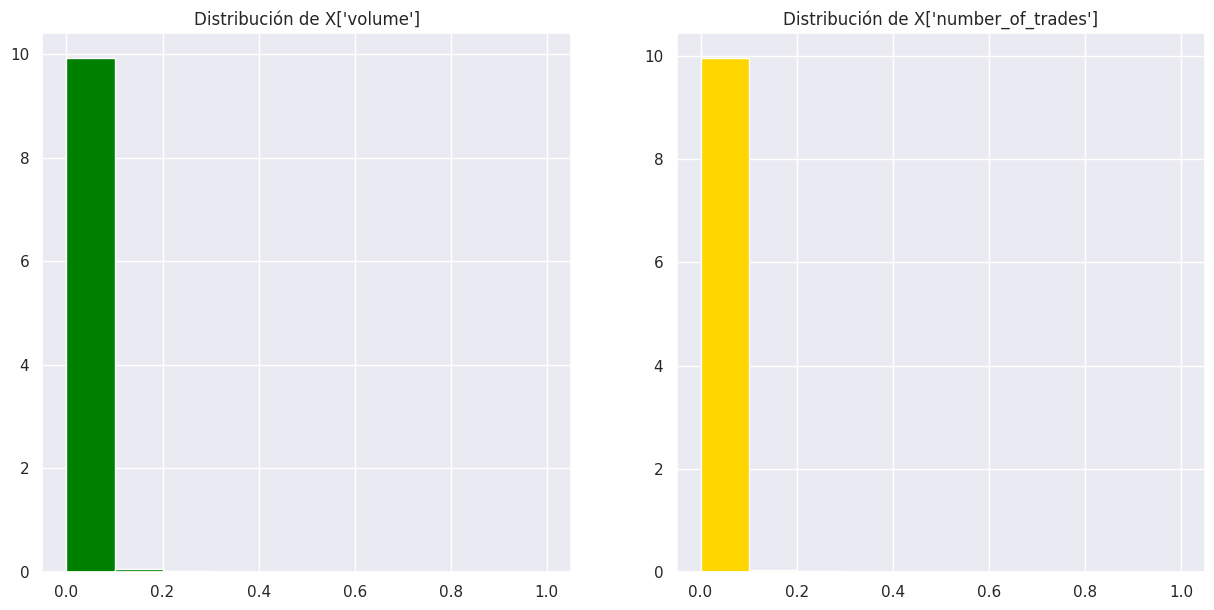

In [162]:
#Vemos como se distribuyen los valores de X_transformed
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.hist(X_transformed[:,0],color='green',density=True)
plt.title("Distribución de X['volume']")
plt.subplot(1,2,2)
plt.hist(X_transformed[:,1],color='gold',density=True)
plt.title("Distribución de X['number_of_trades']");

## 5. Separamos el dataset transformado en entrenamiento y testeo

In [163]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_transformed, y, test_size=0.25, random_state=42)

In [164]:
#Vemos las especificaciones de cada conjunto de datos formados
print(f"Xtrain shape: {Xtrain.shape} | ytrain shape {ytrain.shape}")
print(f"Xtest shape: {Xtest.shape} | ytest shape {ytest.shape}")

Xtrain shape: (22482, 2) | ytrain shape (22482,)
Xtest shape: (7494, 2) | ytest shape (7494,)


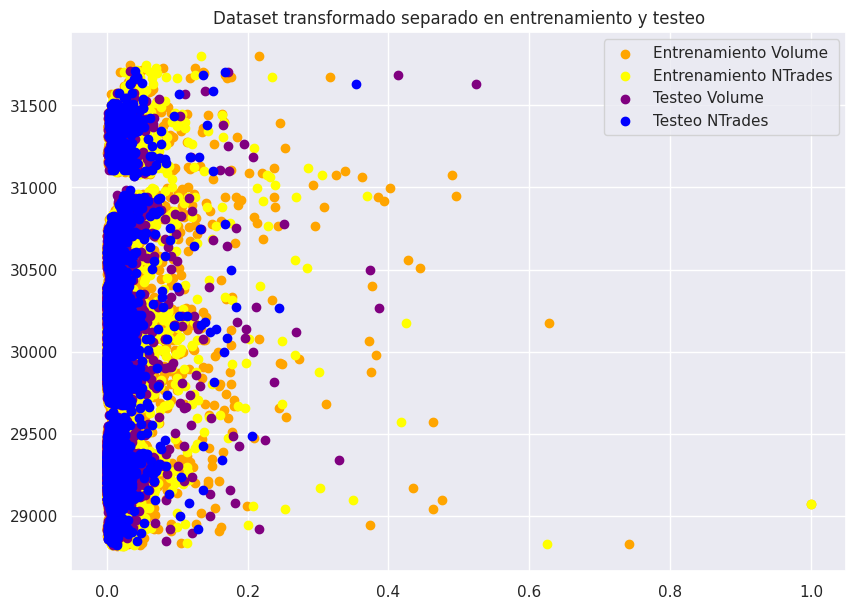

In [165]:
# Vemos gráficamente como queda el dataset transformador separado en entrenamiento y testeo
plt.figure(figsize=(10,7))
plt.scatter(Xtrain[:,0],ytrain,c='orange',label='Entrenamiento Volume')
plt.scatter(Xtrain[:,1],ytrain,c='yellow',label='Entrenamiento NTrades')
plt.scatter(Xtest[:,0],ytest,c='purple',label='Testeo Volume')
plt.scatter(Xtest[:,1],ytest,c='blue',label='Testeo NTrades')
plt.legend()
plt.title("Dataset transformado separado en entrenamiento y testeo");

## 6. Entrenamos el modelo de regresión simple

In [166]:
# Instanciamos el modelo
multilinear_model = LinearRegression()

In [167]:
multilinear_model.fit(Xtrain,ytrain)

LinearRegression()

In [168]:
#Vemos los coefficientes que "aprendió" o "encontró" el modelo que mejor se ajustan a la relación multiple
print(f"Coeficiente que acompañan a las variables de entrada: {multilinear_model.coef_}")
print(f"Intercepto que corta al eje de ordenadas: {multilinear_model.intercept_}")

Coeficiente que acompañan a las variables de entrada: [-2805.11455896  8121.34593583]
Intercepto que corta al eje de ordenadas: 29793.267027168098


## 7. Evaluamos el modelo lineal

In [169]:
#Ahora miramos el R2 usando la función score del modelo entrenado
print(f"Valor de métrica R2 con el conjunto de entrenamiento: {multilinear_model.score(Xtrain,ytrain)}")
print(f"Valor de métrica R2 con el conjunto de testeo: {multilinear_model.score(Xtest,ytest)}")

Valor de métrica R2 con el conjunto de entrenamiento: 0.019801688576495113
Valor de métrica R2 con el conjunto de testeo: 0.03256777262179322


In [170]:
#Calculamos predicciones para el conjunto de testeo y entrenamiento con la función .predict()
y_test_m_pred = multilinear_model.predict(Xtest)
y_train_m_pred = multilinear_model.predict(Xtrain)
y_test_m_pred.shape, y_train_m_pred.shape

((7494,), (22482,))

In [171]:
#Comparamos los valores predichos vs originales del conjunto de testeo y entrenamiento
from sklearn import metrics as ms
test_mae = ms.mean_absolute_error(y_true = ytest, y_pred = y_test_m_pred) #Calculamos el mae entre ytest vs y_test_pred
train_mae = ms.mean_absolute_error(y_true = ytrain, y_pred = y_train_m_pred) #Calculamos el mae entre ytrain vs y_train_pred
test_mse = ms.mean_squared_error(y_true = ytest, y_pred = y_test_m_pred) #Calculamos el mse entre ytest vs y_test_pred
train_mse = ms.mean_squared_error(y_true = ytrain, y_pred = y_train_m_pred) #Calculamos el mse entre ytrain vs y_train_pred
print(f"Valor de métrica MAE con el conjunto de testeo: {test_mae}")
print(f"Valor de métrica MAE con el conjunto de entrenamiento: {train_mae}\n")
print(f"Valor de métrica MSE con el conjunto de testeo: {test_mse}")
print(f"Valor de métrica MSE con el conjunto de entrenamiento: {train_mse}")

Valor de métrica MAE con el conjunto de testeo: 460.3222900559317
Valor de métrica MAE con el conjunto de entrenamiento: 463.56558102788335

Valor de métrica MSE con el conjunto de testeo: 316023.82302523346
Valor de métrica MSE con el conjunto de entrenamiento: 322943.18511314265


In [172]:
# Como sabemos que los valores estan bien, para eso podemos ver cual es el valor promedio, maximo y minimo de conjunto de datos
print(f"Precio maximo: {y.max()} | Precio minimo: {y.min()} | Precio promedio: {y.mean()} | Varianza de los datos de entrada X: {X.var()}")

Precio maximo: 31798.0 | Precio minimo: 28815.0 | Precio promedio: 29843.326131571925 | Varianza de los datos de entrada X: 279902.1550714958


In [173]:
# Vemos los datos de precios predecidos cuanto varían con relación a los originales para darnos un sentido de la magnitud del error
error = [] #creamos una lista para guardar todos los datos obtenidos en el bucle for
for i,j in zip(ytest,y_test_m_pred):
  print(f"{i} vs {j:.2f} --> diferencia = {(i-j):.2f} --> error: {(int(i-j)/i)*100:.2f}%")
  error.append(abs((int(i-j)/i)*100))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
29840.37 vs 29826.20 --> diferencia = 14.17 --> error: 0.05%
29264.56 vs 29807.12 --> diferencia = -542.56 --> error: -1.85%
29881.87 vs 29833.13 --> diferencia = 48.74 --> error: 0.16%
30514.65 vs 29859.33 --> diferencia = 655.32 --> error: 2.15%
31200.0 vs 29837.03 --> diferencia = 1362.97 --> error: 4.37%
30291.48 vs 30084.35 --> diferencia = 207.13 --> error: 0.68%
29326.88 vs 29804.79 --> diferencia = -477.91 --> error: -1.63%
29447.83 vs 29826.23 --> diferencia = -378.40 --> error: -1.28%
30098.69 vs 29810.14 --> diferencia = 288.55 --> error: 0.96%
28970.81 vs 29819.37 --> diferencia = -848.56 --> error: -2.93%
30391.63 vs 29802.50 --> diferencia = 589.13 --> error: 1.94%
29331.89 vs 29869.01 --> diferencia = -537.12 --> error: -1.83%
29353.41 vs 29852.28 --> diferencia = -498.87 --> error: -1.70%
29191.75 vs 29817.43 --> diferencia = -625.68 --> error: -2.14%
30572.01 vs 29801.57 --> diferencia = 770.44 --> erro

In [174]:
print(f"El error promedio de las predicciones con el conjunto de testeo es: {sum(error)/len(error):.2f}%")

El error promedio de las predicciones con el conjunto de testeo es: 1.54%
